# COSC 6373 - HW3-ICA - Minh Nguyen #2069407

In [1]:
import numpy as np
import keras
from keras import layers

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [8]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# split 10% from the training data for validation
split_index = int(len(x_train) * 0.9)
x_val, x_train = x_train[split_index:], x_train[:split_index]
y_val, y_train = y_train[split_index:], y_train[:split_index]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_val = x_val.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_val.shape[0], "validation samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (54000, 28, 28, 1)
x_val shape: (6000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
54000 train samples
6000 validation samples
10000 test samples


In [6]:
# Define the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model for 10 epochs (batch_size=32, optimizer=Adam, dropout=0.5, activation=relu)
batch_size = 32
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8597 - loss: 0.4938 - val_accuracy: 0.9717 - val_loss: 0.1075
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9577 - loss: 0.1425 - val_accuracy: 0.9782 - val_loss: 0.0808
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9649 - loss: 0.1161 - val_accuracy: 0.9820 - val_loss: 0.0697
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9728 - loss: 0.0928 - val_accuracy: 0.9828 - val_loss: 0.0600
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9754 - loss: 0.0823 - val_accuracy: 0.9845 - val_loss: 0.0580
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9773 - loss: 0.0744 - val_accuracy: 0.9865 - val_loss: 0.0520
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9793 - loss: 0.0664 - val_accuracy: 0.9872 - val_loss: 0.0482
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9811 - loss: 0.05

In [10]:
# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04514104872941971
Test accuracy: 0.9857000112533569


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


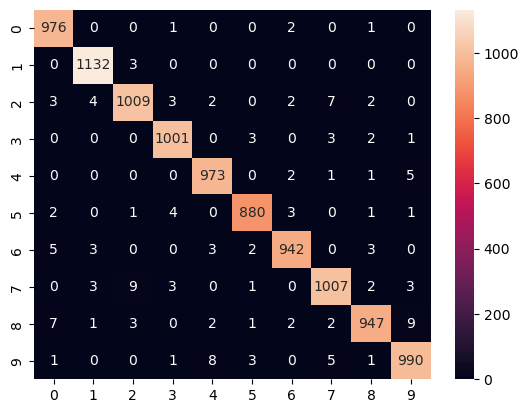

Test accuracy: 0.9857


In [11]:
# Report the confusion matrix and the test accuracy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_true_class = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true_class, y_pred_class)
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.show()
print("Test accuracy:", np.mean(y_true_class == y_pred_class))


In [12]:
# Update the base model by adding more layers - x2 Conv2D layers
model_x2_conv = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_x2_conv.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the updated model for 10 epochs (batch_size=32, optimizer=Adam, dropout=0.5, activation=relu)
model_x2_conv.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_x2_conv.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8496 - loss: 0.4726 - val_accuracy: 0.9818 - val_loss: 0.0618
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9716 - loss: 0.0920 - val_accuracy: 0.9885 - val_loss: 0.0399
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9782 - loss: 0.0692 - val_accuracy: 0.9907 - val_loss: 0.0346
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9817 - loss: 0.0571 - val_accuracy: 0.9902 - val_loss: 0.0354
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9836 - loss: 0.0507 - val_accuracy: 0.9910 - val_loss: 0.0331
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9850 - loss: 0.0463 - val_accuracy: 0.9918 - val_loss: 0.0295
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.9927 - val_loss: 0.0290
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9881 - loss: 0

Test loss: 0.025922689586877823
Test accuracy: 0.9911999702453613
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


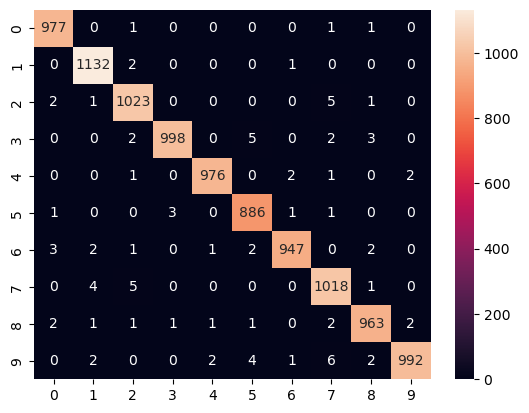

Test accuracy: 0.9912


In [15]:
# Evaluate the updated model on the test data
score_x2_conv = model_x2_conv.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_x2_conv[0])
print("Test accuracy:", score_x2_conv[1])

# Report the confusion matrix and the test accuracy
y_pred_x2_conv = model_x2_conv.predict(x_test)
y_pred_class_x2_conv = np.argmax(y_pred_x2_conv, axis=1)
confusion_mtx_x2_conv = confusion_matrix(y_true_class, y_pred_class_x2_conv)
sns.heatmap(confusion_mtx_x2_conv, annot=True, fmt="d")
plt.show()
print("Test accuracy:", np.mean(y_true_class == y_pred_class_x2_conv))

- The updated model with 2 Conv2D layers performs slightly better than the base model. It has a higher accuracy and lower loss. (Accuracy: 0.9912 vs 0.9867, Loss: 0.02 vs 0.04)

In [16]:
# Update the base model by adding more layers - x3 Conv2D layers
model_x3_conv = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_x3_conv.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,962 (367.04 KB)

 Trainable params: 93,962 (367.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the updated model for 10 epochs (batch_size=32, optimizer=Adam, dropout=0.5, activation=relu)
model_x3_conv.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_x3_conv.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8061 - loss: 0.6048 - val_accuracy: 0.9808 - val_loss: 0.0671
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9618 - loss: 0.1296 - val_accuracy: 0.9843 - val_loss: 0.0527
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9718 - loss: 0.0932 - val_accuracy: 0.9873 - val_loss: 0.0419
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9777 - loss: 0.0764 - val_accuracy: 0.9883 - val_loss: 0.0403
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9816 - loss: 0.0610 - val_accuracy: 0.9888 - val_loss: 0.0388
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9822 - loss: 0.0584 - val_accuracy: 0.9892 - val_loss: 0.0379
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9844 - loss: 0.0513 - val_accuracy: 0.9897 - val_loss: 0.0401
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9870 - loss: 0

Test loss: 0.038025468587875366
Test accuracy: 0.9900000095367432
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


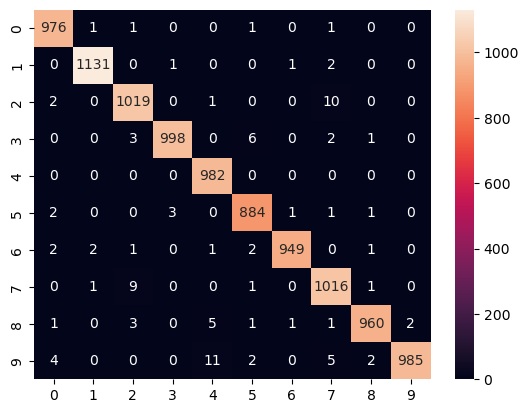

Test accuracy: 0.99


In [18]:
# Evaluate the updated model on the test data
score_x3_conv = model_x3_conv.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_x3_conv[0])
print("Test accuracy:", score_x3_conv[1])

# Report the confusion matrix and the test accuracy
y_pred_x3_conv = model_x3_conv.predict(x_test)
y_pred_class_x3_conv = np.argmax(y_pred_x3_conv, axis=1)
confusion_mtx_x3_conv = confusion_matrix(y_true_class, y_pred_class_x3_conv)
sns.heatmap(confusion_mtx_x3_conv, annot=True, fmt="d")
plt.show()
print("Test accuracy:", np.mean(y_true_class == y_pred_class_x3_conv))

- The model with 3 layers of Conv2D performs similarly to the model with 2 layers. The test accuracy is kind of the same, however, it has a higher loss (0.038 vs 0.02).

In [22]:
# Update the base model with a different activation function - sigmoid
model_sigmoid = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model_sigmoid.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train the updated model for 10 epochs (batch_size=32, optimizer=Adam, dropout=0.5, activation=sigmoid)

model_sigmoid.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_sigmoid.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8544 - loss: 0.4990 - val_accuracy: 0.9740 - val_loss: 0.1008
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9599 - loss: 0.1361 - val_accuracy: 0.9797 - val_loss: 0.0738
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9680 - loss: 0.1045 - val_accuracy: 0.9828 - val_loss: 0.0651
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9724 - loss: 0.0892 - val_accuracy: 0.9843 - val_loss: 0.0605
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9747 - loss: 0.0807 - val_accuracy: 0.9847 - val_loss: 0.0589
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9776 - loss: 0.0719 - val_accuracy: 0.9847 - val_loss: 0.0530
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9803 - loss: 0.0632 - val_accuracy: 0.9850 - val_loss: 0.0522
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9810 - loss: 0.0612

Test loss: 0.0494907945394516
Test accuracy: 0.9843999743461609
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


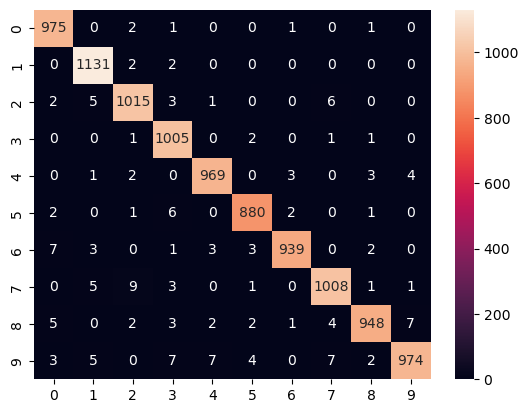

Test accuracy: 0.9844


In [24]:
# Evaluate the updated model on the test data
score_sigmoid = model_sigmoid.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_sigmoid[0])
print("Test accuracy:", score_sigmoid[1])

# Report the confusion matrix and the test accuracy
y_pred_sigmoid = model_sigmoid.predict(x_test)
y_pred_class_sigmoid = np.argmax(y_pred_sigmoid, axis=1)
confusion_mtx_sigmoid = confusion_matrix(y_true_class, y_pred_class_sigmoid)
sns.heatmap(confusion_mtx_sigmoid, annot=True, fmt="d")
plt.show()
print("Test accuracy:", np.mean(y_true_class == y_pred_class_sigmoid))

- The model with sigmoid activation function performs worse than most of the models above, with a test accuracy of 0.9842 (still very good), but it has a higher loss of 0.05.

In [25]:
# Update the model and train with a different batch size - 64
model_batch_64 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_batch_64.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the updated model for 10 epochs (batch_size=64, optimizer=Adam, dropout=0.5, activation=relu)
batch_size_64 = 64

model_batch_64.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_batch_64.fit(x_train, y_train, batch_size=batch_size_64, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8301 - loss: 0.6043 - val_accuracy: 0.9675 - val_loss: 0.1201
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9548 - loss: 0.1587 - val_accuracy: 0.9765 - val_loss: 0.0868
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9635 - loss: 0.1198 - val_accuracy: 0.9818 - val_loss: 0.0711
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9702 - loss: 0.1003 - val_accuracy: 0.9803 - val_loss: 0.0673
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9724 - loss: 0.0887 - val_accuracy: 0.9827 - val_loss: 0.0628
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9739 - loss: 0.0839 - val_accuracy: 0.9833 - val_loss: 0.0590
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9765 - loss: 0.0784 - val_accuracy: 0.9857 - val_loss: 0.0542
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9776 - loss: 0.0716 - val_accuracy: 0.

Test loss: 0.051112327724695206
Test accuracy: 0.9835000038146973
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


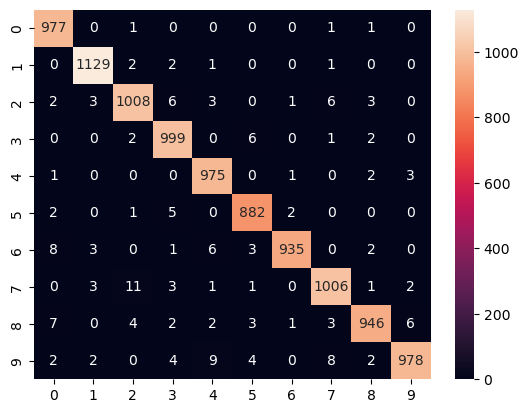

Test accuracy: 0.9835


In [27]:
# Evaluate the updated model on the test data
score_batch_64 = model_batch_64.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_batch_64[0])
print("Test accuracy:", score_batch_64[1])

# Report the confusion matrix and the test accuracy
y_pred_batch_64 = model_batch_64.predict(x_test)
y_pred_class_batch_64 = np.argmax(y_pred_batch_64, axis=1)
confusion_mtx_batch_64 = confusion_matrix(y_true_class, y_pred_class_batch_64)
sns.heatmap(confusion_mtx_batch_64, annot=True, fmt="d")
plt.show()
print("Test accuracy:", np.mean(y_true_class == y_pred_class_batch_64))

- The base model but trained with a batch size of 64 has a slightly lower accuracy and higher loss compared to the other models. (Accuracy: 0.9835, Loss: 0.05)

In [28]:
# Try to train a model with 2 layers of Conv2D with a batch size of 128
model_2x_conv_batch_128 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_2x_conv_batch_128.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the updated model for 10 epochs (batch_size=128, optimizer=Adam, dropout=0.5, activation=relu)
model_2x_conv_batch_128.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_2x_conv_batch_128.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9814 - loss: 0.0607 - val_accuracy: 0.9907 - val_loss: 0.0385
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9835 - loss: 0.0521 - val_accuracy: 0.9907 - val_loss: 0.0328
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9844 - loss: 0.0479 - val_accuracy: 0.9913 - val_loss: 0.0316
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9857 - loss: 0.0442 - val_accuracy: 0.9918 - val_loss: 0.0316
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9856 - loss: 0.0460 - val_accuracy: 0.9918 - val_loss: 0.0292
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9874 - loss: 0.0393 - val_accuracy: 0.9915 - val_loss: 0.0301
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9881 - loss: 0.0379 - val_accuracy: 0.9917 - val_loss: 0.0310
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9875 - loss: 0.0375 - val_accu

Test loss: 0.023889461532235146
Test accuracy: 0.9914000034332275
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


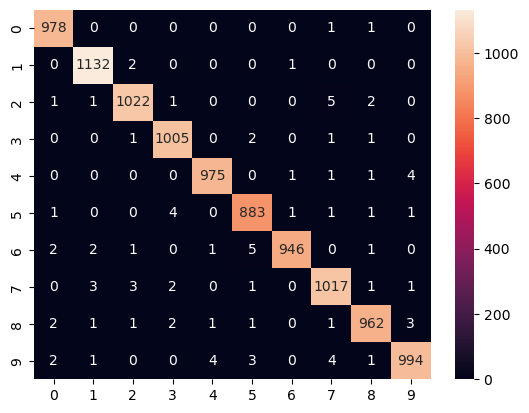

Test accuracy: 0.9914


In [31]:
# Evaluate the updated model on the test data
score_2x_conv_batch_128 = model_2x_conv_batch_128.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_2x_conv_batch_128[0])
print("Test accuracy:", score_2x_conv_batch_128[1])

# Report the confusion matrix and the test accuracy
y_pred_2x_conv_batch_128 = model_2x_conv_batch_128.predict(x_test)
y_pred_class_2x_conv_batch_128 = np.argmax(y_pred_2x_conv_batch_128, axis=1)
confusion_mtx_2x_conv_batch_128 = confusion_matrix(y_true_class, y_pred_class_2x_conv_batch_128)
sns.heatmap(confusion_mtx_2x_conv_batch_128, annot=True, fmt="d")
plt.show()
print("Test accuracy:", np.mean(y_true_class == y_pred_class_2x_conv_batch_128))

- The model with 2 layers of Conv2D and a batch size of 128 performs the best among the others in this analysis, with a test accuracy of 0.9914 and a loss of 0.0239.

4. What is the difference between epoch and batch? How does batch size affect the training
time and performance?
- Epoch: epoch is the number of times that the entire training dataset is passed through the network.
- Batch: Batch size is the number of training samples (subset) that are fed to the network at once. The number of batches in an epoch is equal to the number of training samples divided by the batch size.

- The batch size affects the training time and performance in the following ways:
    - Larger batch sizes can speed up the training process because the model updates its weights less frequently per epoch. However, it may lead to a lower generalization performance.
    - Smaller batch sizes can slow down the training process because the model updates its weights more frequently. However, it may lead to a better accuracy by capturing more information from the training data. It may be more computationally expensive.

5. What is the purpose of the max pooling layer?

- The purpose of the max pooling layer is to reduce the spatial dimensions of the input volume. It selects the maximum value within a local region. It helps to reduce the number of parameters and computation in the network, which also can help to prevent overfitting. Max pooling also helps to make the network more robust to small variations in the input data by capturing the most important features in the input volume.